## TN - GENERAL ELECTION TO VIDHAN SABHA TRENDS & RESULT MAY-2021 

In [149]:
all_parties = \
['All India Anna Dravida Munnetra Kazhagam',
 'Dravida Munnetra Kazhagam', 
 'Naam Tamilar Katchi', 
 'Makkal Needhi Maiam',
 'Amma Makkal Munnettra Kazagam',
 'Desiya Murpokku Dravida Kazhagam',
 'Pattali Makkal Katchi', 
 'Indian National Congress',
'Bharatiya Janata Party',
 'Viduthalai Chiruthaigal Katchi'
]

In [150]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

plt.rcParams.update({'font.size': 6})

In [233]:
def get_cons_data(cons = list(range(1,235))):
    kk = 0
    j = 1
    all_cons = []
    all_data = []
    dfs = []
    for j in cons:
        url="https://results.eci.gov.in/Result2021/ConstituencywiseS22{}.htm".format(j) # Site URL
        result = 0
        # Make a GET request to fetch the raw HTML content
        html_content = requests.get(url).text
        soup = BeautifulSoup(html_content, "lxml")
        gdp = soup.find_all("table")
        # print("Number of tables on site: ",len(gdp))
        table1 = gdp[0]
        body = table1.find_all("tr")
        tble_all = body[6].find_all("tr")[5].find_all("tr")
        ln = len(tble_all)-5
        par_con = False
        if ln > 0:
            constituency = str((tble_all[0].text).strip())
            constituency = constituency.split('-')[-1]
            print(j, constituency)
            all_cons.append(constituency)
#             party = 'All India Anna Dravida Munnetra Kazhagam'
            last = tble_all[-2].find_all("td")
            last_row = [l.text for l in last]
            all_votes = int(last_row[-2])
            kk = kk +1
            max_per = 0
            for k in range(ln):
                i = k+3
                ct = tble_all[i].find_all("td")
                row = [s.text for s in ct]
                per1 = float(row[-1]) 
                if per1 > max_per:
                    max_per=per1
#                 print(row)
                all_data.append(row[1:])
            df = pd.DataFrame(all_data, columns = ['Candidate' ,'Party' ,'EVM Votes', 'Postal Votes', 'Total Votes','%'])
            dfs.append(df) 
            df.to_csv('./out/'+str(j)+ '_'+ constituency + 'result.csv')
           
    #                 print(row)
    # print(all_data)

    # print('Total constituencies:',kk)
    return dfs
dfs = get_cons_data()
# dfs[0]

1 Gummidipoondi
2 Ponneri
3 Tiruttani
4 Thiruvallur
5 Poonamallee
6 Avadi
7 Maduravoyal
8 Ambattur
9 Madavaram
10 Thiruvottiyur
11 Dr.Radhakrishnan Nagar
12 Perambur
13 Kolathur
14 Villivakkam
15 Nagar
16 Egmore
17 Royapuram
18 Harbour
19 Thiruvallikeni
20 Thousand Lights
21 Anna Nagar
22 Virugampakkam
23 Saidapet
24 Thiyagarayanagar
25 Mylapore
26 Velachery
27 Shozhinganallur
28 Alandur
29 Sriperumbudur
30 Pallavaram
31 Tambaram
32 Chengalpattu
33 Thiruporur
34 Cheyyur
35 Madurantakam
36 Uthiramerur
37 Kancheepuram
38 Arakkonam
39 Sholinghur
40 Katpadi
41 Ranipet
42 Arcot
43 Vellore
44 Anaikattu
45 Kilvaithinankuppam
46 Gudiyattam
47 Vaniyambadi
48 Ambur
49 Jolarpet
50 Tirupattur
51 Uthangarai
52 Bargur
53 Krishnagiri
54 Veppanahalli
55 Hosur
56 Thalli
57 Palacode
58 Pennagaram
59 Dharmapuri
60 Pappireddipatti
61 Harur
62 Chengam
63 Tiruvannamalai
64 Kilpennathur
65 Kalasapakkam
66 Polur
67 Arani
68 Cheyyar
69 Vandavasi
70 Gingee
71 Mailam
72 Tindivanam
73 Vanur
74 Villupuram
75 Vikra

In [234]:
def get_data(party, cons = list(range(1,235))):
    kk = 0
    j = 1
    
    all_data = []
    for j in cons:
        url="https://results.eci.gov.in/Result2021/ConstituencywiseS22{}.htm".format(j) # Site URL
        result = 0
        # Make a GET request to fetch the raw HTML content
        html_content = requests.get(url).text
        soup = BeautifulSoup(html_content, "lxml")
        gdp = soup.find_all("table")
        # print("Number of tables on site: ",len(gdp))
        table1 = gdp[0]
        body = table1.find_all("tr")
        tble_all = body[6].find_all("tr")[5].find_all("tr")
        ln = len(tble_all)-5
        par_con = False
        if ln > 0:
            constituency = str((tble_all[0].text).strip())
            constituency = constituency.split('-')[-1]
    #         print(j, constituency)
#             party = 'All India Anna Dravida Munnetra Kazhagam'
            last = tble_all[-2].find_all("td")
            last_row = [l.text for l in last]
            all_votes = int(last_row[-2])
            kk = kk +1
            max_per = 0
            for k in range(ln):
                i = k+3
                ct = tble_all[i].find_all("td")
                row = [s.text for s in ct]
                per1 = float(row[-1]) 
                if per1 > max_per:
                    max_per=per1
    #             print(row)
                if party in row:
                    par_con = True
                    totVotes = row[-2]
                    per = float(row[-1])
            if par_con:
                if per >= max_per:
                    result = 1
                data = [constituency, int(totVotes), per, all_votes, result]

                print(constituency, per, result)
                all_data.append(data)
    #                 print(row)
    # print(all_data)

    # print('Total constituencies:',kk)
    return pd.DataFrame(all_data, columns = ["constituency", "Total votes", "%", 'All party votes', 'result'])
# df_admk = get_data('All India Anna Dravida Munnetra Kazhagam')

# AIADMK

In [152]:
df_admk = get_data('All India Anna Dravida Munnetra Kazhagam')

Ponneri 39.66 0
Tiruttani 37.62 0
Thiruvallur 40.12 0
Avadi 31.03 0
Maduravoyal 33.18 0
Ambattur 30.81 0
Madavaram 30.85 0
Thiruvottiyur 26.05 0
Dr.Radhakrishnan Nagar 28.71 0
Perambur 25.08 0
Kolathur 21.71 0
Villivakkam 28.47 0
Nagar 21.45 0
Egmore 26.08 0
Royapuram 30.57 0
Anna Nagar 34.19 0
Virugampakkam 33.45 0
Saidapet 34.86 0
Thiyagarayanagar 33.33 0
Mylapore 36.3 0
Velachery 36.52 0
Shozhinganallur 38.22 0
Alandur 31.8 0
Sriperumbudur 44.15 1
Pallavaram 30.89 0
Tambaram 33.19 0
Chengalpattu 37.9 0
Cheyyur 43.46 0
Madurantakam 46.47 1
Uthiramerur 40.76 1
Arakkonam 49.82 1
Katpadi 45.51 0
Ranipet 41.73 0
Vellore 39.99 0
Anaikattu 44.49 0
Kilvaithinankuppam 48.57 1
Gudiyattam 45.23 0
Vaniyambadi 37.61 0
Ambur 39.49 0
Jolarpet 45.02 0
Uthangarai 52.36 1
Bargur 42.8 0
Krishnagiri 48.57 1
Veppanahalli 45.87 1
Hosur 43.51 0
Palacode 53.28 1
Pappireddipatti 53.62 1
Harur 49.89 1
Chengam 43.38 0
Kalasapakkam 42.74 0
Polur 49.11 1
Arani 49.31 1
Cheyyar 42.05 0
Tindivanam 46.44 1
Vanur 50

In [153]:
df_admk.describe()

,Total votes,%,All party votes,result
count,191.000000,191.000000,191.000000,191.000000
mean,51923.408377,40.530681,126699.863874,0.361257
std,26093.909032,8.128990,54953.902290,0.481627
min,5431.000000,18.060000,8872.000000,0.000000
25%,31158.000000,35.555000,85351.000000,0.000000
50%,49931.000000,41.290000,121439.000000,0.000000
75%,70560.000000,46.455000,175878.500000,1.000000
max,121425.000000,69.970000,225083.000000,1.000000


In [154]:
df_admk.result.sum()

69

In [155]:
vote_per = 100*df_admk["Total votes"].sum()/df_admk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 40.981 %


<AxesSubplot:title={'center':'AIADMK'}, xlabel='constituency'>

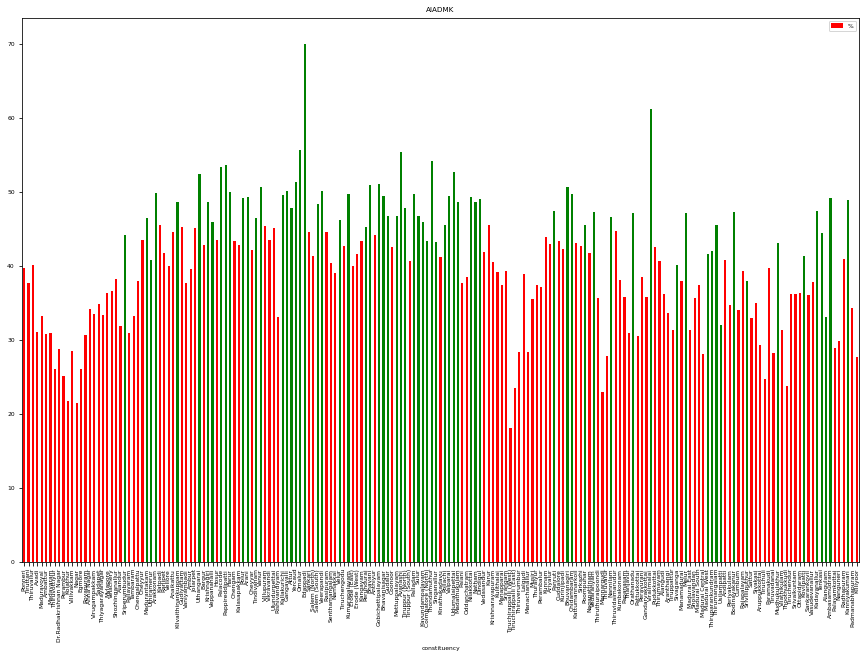

In [156]:
df_admk.plot(x="constituency", y="%", kind="bar",color=df_admk['result'].replace({1: "green", 0: "red"}), title='AIADMK', figsize=(15, 10))

In [157]:
df_admk[df_admk['%']>45]

,constituency,Total votes,%,All party votes,result
28,Madurantakam,45206,46.47,97279,1
30,Arakkonam,85399,49.82,171412,1
31,Katpadi,55267,45.51,121439,0
35,Kilvaithinankuppam,84579,48.57,174124,1
36,Gudiyattam,34333,45.23,75906,0
...,...,...,...,...,...
158,Thirumangalam,77080,45.44,169633,1
162,Bodinayakanur,50194,47.23,106281,1
181,Kadayanallur,32450,47.33,68563,1
184,Ambasamudram,63200,49.17,128527,1


In [158]:
df_admk[df_admk.result == 1]

,constituency,Total votes,%,All party votes,result
23,Sriperumbudur,26837,44.15,60785,1
28,Madurantakam,45206,46.47,97279,1
29,Uthiramerur,11373,40.76,27900,1
30,Arakkonam,85399,49.82,171412,1
35,Kilvaithinankuppam,84579,48.57,174124,1
...,...,...,...,...,...
181,Kadayanallur,32450,47.33,68563,1
182,Tenkasi,48815,44.34,110098,1
183,Alangulam,28126,33.02,85177,1
184,Ambasamudram,63200,49.17,128527,1


# DMK

In [159]:
df_dmk = get_data('Dravida Munnetra Kazhagam')

Gummidipoondi 55.54 1
Tiruttani 53.14 1
Thiruvallur 49.97 1
Poonamallee 57.19 1
Avadi 50.3 1
Maduravoyal 44.23 1
Ambattur 45.43 1
Madavaram 49.12 1
Thiruvottiyur 43.89 1
Dr.Radhakrishnan Nagar 50.29 1
Perambur 51.3 1
Kolathur 57.79 1
Villivakkam 50.82 1
Nagar 57.1 1
Egmore 56.43 1
Royapuram 51.93 1
Harbour 58.35 1
Thiruvallikeni 67.89 1
Thousand Lights 54.19 1
Anna Nagar 46.76 1
Virugampakkam 44.7 1
Saidapet 45.92 1
Thiyagarayanagar 46.23 1
Mylapore 44.6 1
Shozhinganallur 40.15 1
Alandur 49.74 1
Pallavaram 47.42 1
Tambaram 46.13 1
Chengalpattu 46.77 1
Madurantakam 44.63 0
Uthiramerur 40.21 0
Kancheepuram 45.58 1
Katpadi 45.55 1
Ranipet 49.82 1
Arcot 49.52 1
Vellore 50.97 1
Anaikattu 48.52 1
Kilvaithinankuppam 42.5 0
Gudiyattam 46.37 1
Ambur 50.86 1
Jolarpet 45.57 1
Tirupattur 51.91 1
Bargur 49.17 1
Krishnagiri 41.44 0
Veppanahalli 44.38 0
Hosur 49.01 1
Palacode 39.68 0
Pennagaram 38.24 0
Dharmapuri 35.84 0
Pappireddipatti 33.6 0
Chengam 48.01 1
Tiruvannamalai 66.02 1
Kilpennathur 50.35

In [160]:
df_dmk.describe()

,Total votes,%,All party votes,result
count,188.000000,188.000000,188.000000,188.000000
mean,59509.537234,46.227713,128671.239362,0.702128
std,27093.347543,7.035367,55015.021551,0.458544
min,2827.000000,23.810000,8872.000000,0.000000
25%,39214.000000,42.837500,87795.500000,0.000000
50%,59791.500000,46.150000,129003.000000,1.000000
75%,79003.750000,50.292500,176007.000000,1.000000
max,137876.000000,72.790000,225083.000000,1.000000


In [161]:
df_dmk.result.sum()

132

In [162]:
vote_per = 100*df_dmk["Total votes"].sum()/df_dmk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 46.249 %


<AxesSubplot:title={'center':'DMK'}, xlabel='constituency'>

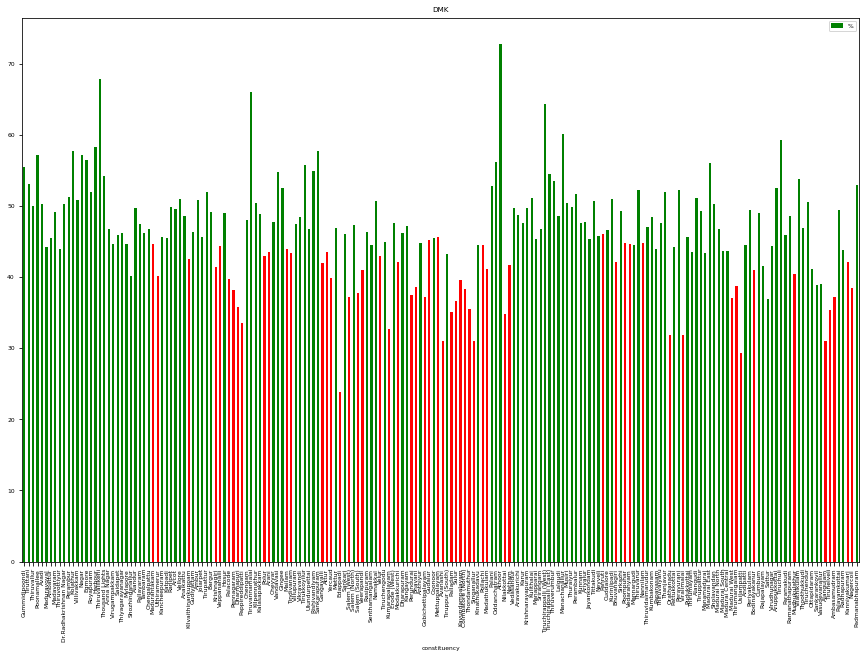

In [163]:
df_dmk.plot(x="constituency", y="%", kind="bar",color=df_dmk['result'].replace({1: "green", 0: "red"}), title='DMK', figsize=(15, 10))

In [164]:
df_dmk[df_dmk['%']>42]

,constituency,Total votes,%,All party votes,result
0,Gummidipoondi,65291,55.54,117557,1
1,Tiruttani,46891,53.14,88234,1
2,Thiruvallur,95100,49.97,190321,1
3,Poonamallee,125746,57.19,219869,1
4,Avadi,50501,50.30,100393,1
...,...,...,...,...,...
176,Tiruchendur,88274,50.58,174536,1
183,Palayamkottai,48354,49.38,97913,1
184,Radhapuram,60983,43.80,139228,1
185,Kanniyakumari,39070,42.16,92664,0


In [165]:
df_dmk[df_dmk.result == 1]

,constituency,Total votes,%,All party votes,result
0,Gummidipoondi,65291,55.54,117557,1
1,Tiruttani,46891,53.14,88234,1
2,Thiruvallur,95100,49.97,190321,1
3,Poonamallee,125746,57.19,219869,1
4,Avadi,50501,50.30,100393,1
...,...,...,...,...,...
178,Sankarankovil,71347,38.92,183338,1
179,Vasudevanallur,68730,39.08,175881,1
183,Palayamkottai,48354,49.38,97913,1
184,Radhapuram,60983,43.80,139228,1


# NTK

In [235]:
df_ntk = get_data('Naam Tamilar Katchi')

Gummidipoondi 5.27 0
Ponneri 8.97 0
Tiruttani 5.14 0
Thiruvallur 7.01 0
Poonamallee 11.37 0
Avadi 9.69 0
Maduravoyal 7.85 0
Ambattur 9.76 0
Madavaram 9.09 0
Thiruvottiyur 24.3 0
Dr.Radhakrishnan Nagar 10.93 0
Perambur 10.03 0
Kolathur 7.16 0
Villivakkam 7.62 0
Nagar 8.46 0
Egmore 5.26 0
Royapuram 6.56 0
Harbour 3.3 0
Thiruvallikeni 6.69 0
Thousand Lights 6.54 0
Anna Nagar 5.88 0
Virugampakkam 5.57 0
Saidapet 6.25 0
Thiyagarayanagar 6.76 0
Mylapore 6.6 0
Velachery 8.38 0
Shozhinganallur 9.3 0
Alandur 8.19 0
Sriperumbudur 7.91 0
Pallavaram 9.52 0
Tambaram 7.58 0
Chengalpattu 9.8 0
Thiruporur 9.01 0
Cheyyur 5.47 0
Madurantakam 5.07 0
Uthiramerur 6.19 0
Kancheepuram 5.25 0
Arakkonam 8.54 0
Sholinghur 4.28 0
Katpadi 5.56 0
Ranipet 4.93 0
Arcot 5.76 0
Vellore 4.52 0
Anaikattu 4.11 0
Kilvaithinankuppam 5.76 0
Gudiyattam 5.29 0
Vaniyambadi 5.91 0
Ambur 5.71 0
Jolarpet 6.79 0
Tirupattur 6.52 0
Uthangarai 5.9 0
Bargur 5.11 0
Krishnagiri 5.75 0
Veppanahalli 4.05 0
Hosur 4.43 0
Thalli 1.98 0
Palac

In [236]:
df_ntk.describe()

,Total votes,%,All party votes,result
count,234.000000,234.000000,234.000000,234.0
mean,10763.764957,6.570897,162630.158120,0.0
std,5699.498857,2.470588,49858.264467,0.0
min,379.000000,1.980000,8872.000000,0.0
25%,7342.000000,4.935000,135916.000000,0.0
50%,9965.000000,6.030000,172514.000000,0.0
75%,12932.500000,7.832500,197799.750000,0.0
max,48597.000000,24.300000,282029.000000,0.0


In [237]:
df_ntk.result.sum()

0

In [257]:
df_ntk["Total votes"].sum()

2518721

In [239]:
vote_per = 100*df_ntk["Total votes"].sum()/df_ntk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 6.619 %


<AxesSubplot:title={'center':'NTK'}, xlabel='constituency'>

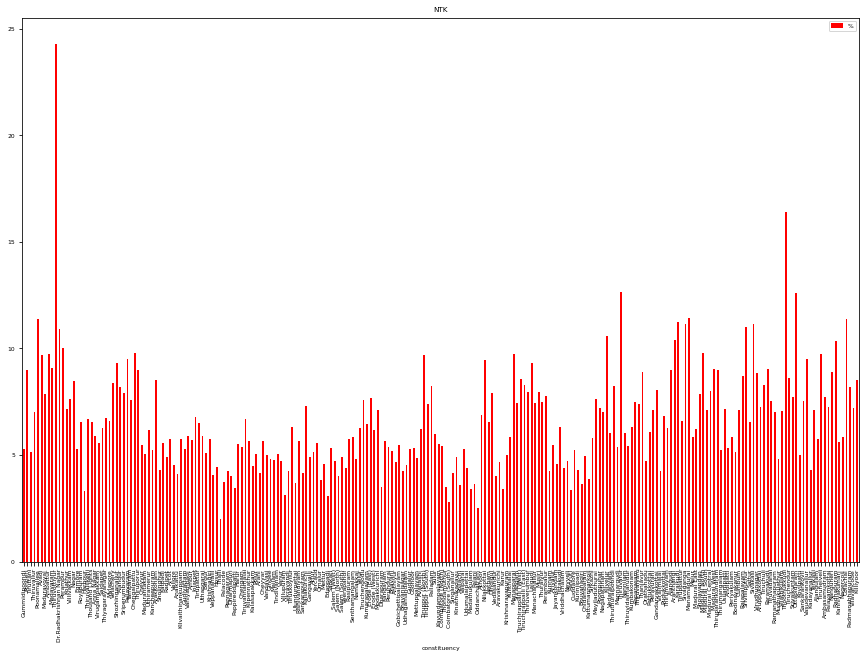

In [240]:
df_ntk.plot(x="constituency", y="%", kind="bar",color=df_ntk['result'].replace({1: "green", 0: "red"}), title='NTK', figsize=(15, 10))

In [241]:
df_ntk[df_ntk['%']>10]#.count()

,constituency,Total votes,%,All party votes,result
4,Poonamallee,29804,11.37,262138,0
9,Thiruvottiyur,48597,24.30,199996,0
10,Dr.Radhakrishnan Nagar,20437,10.93,187027,0
11,Perambur,16843,10.03,167859,0
163,Kilvelur,7471,10.60,70504,0
167,Thiruvarur,26300,12.63,208290,0
182,Aranthangi,11395,10.40,109583,0
183,Karaikudi,23872,11.24,212456,0
185,Sivaganga,22500,11.14,202044,0
186,Manamadurai,23228,11.44,203061,0


In [242]:
df_ntk[df_ntk['%']<3]

,constituency,Total votes,%,All party votes,result
55,Thalli,3387,1.98,171169,0
119,Coimbatore (South),4300,2.78,154765,0
127,Oddanchatram,4272,2.51,170118,0


In [176]:
df_ntk[df_ntk.result == 1]

,constituency,Total votes,%,All party votes,result


# MNM

In [243]:
df_mnm = get_data('Makkal Needhi Maiam')

Ponneri 2.59 0
Poonamallee 4.52 0
Avadi 5.99 0
Maduravoyal 11.82 0
Ambattur 9.84 0
Madavaram 5.29 0
Thiruvottiyur 3.53 0
Dr.Radhakrishnan Nagar 5.99 0
Perambur 8.84 0
Kolathur 8.8 0
Villivakkam 9.47 0
Nagar 7.78 0
Egmore 8.38 0
Royapuram 6.74 0
Harbour 3.7 0
Thousand Lights 8.67 0
Anna Nagar 10.52 0
Virugampakkam 11.43 0
Saidapet 9.35 0
Thiyagarayanagar 10.8 0
Mylapore 9.71 0
Velachery 12.83 0
Shozhinganallur 9.12 0
Alandur 8.88 0
Sriperumbudur 2.85 0
Pallavaram 5.64 0
Tambaram 9.27 0
Thiruporur 3.61 0
Cheyyur 1.16 0
Madurantakam 0.83 0
Uthiramerur 1.67 0
Kancheepuram 4.89 0
Arakkonam 2.07 0
Sholinghur 0.75 0
Ranipet 1.33 0
Arcot 1.36 0
Vellore 3.98 0
Vaniyambadi 0.98 0
Ambur 0.92 0
Uthangarai 0.65 0
Krishnagiri 1.34 0
Veppanahalli 0.33 0
Hosur 2.55 0
Palacode 0.57 0
Pennagaram 0.7 0
Dharmapuri 2.34 0
Pappireddipatti 0.78 0
Tiruvannamalai 2.99 0
Kilpennathur 0.7 0
Polur 0.78 0
Arani 0.6 0
Cheyyar 1.13 0
Vandavasi 0.91 0
Gingee 1.04 0
Tindivanam 1.14 0
Vanur 1.37 0
Villupuram 0.93 0
Ulu

In [244]:
df_mnm.describe()

,Total votes,%,All party votes,result
count,180.000000,180.000000,180.000000,180.0
mean,5164.233333,3.433611,156444.861111,0.0
std,5915.251523,3.931656,51492.118394,0.0
min,14.000000,0.160000,8872.000000,0.0
25%,1380.250000,0.995000,123910.500000,0.0
50%,2958.500000,1.985000,170381.000000,0.0
75%,7601.250000,4.910000,193636.500000,0.0
max,51481.000000,33.260000,282029.000000,0.0


In [245]:
df_mnm.result.sum()

0

In [246]:
vote_per = 100*df_mnm["Total votes"].sum()/df_mnm['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 3.301 %


<AxesSubplot:title={'center':'MNM'}, xlabel='constituency'>

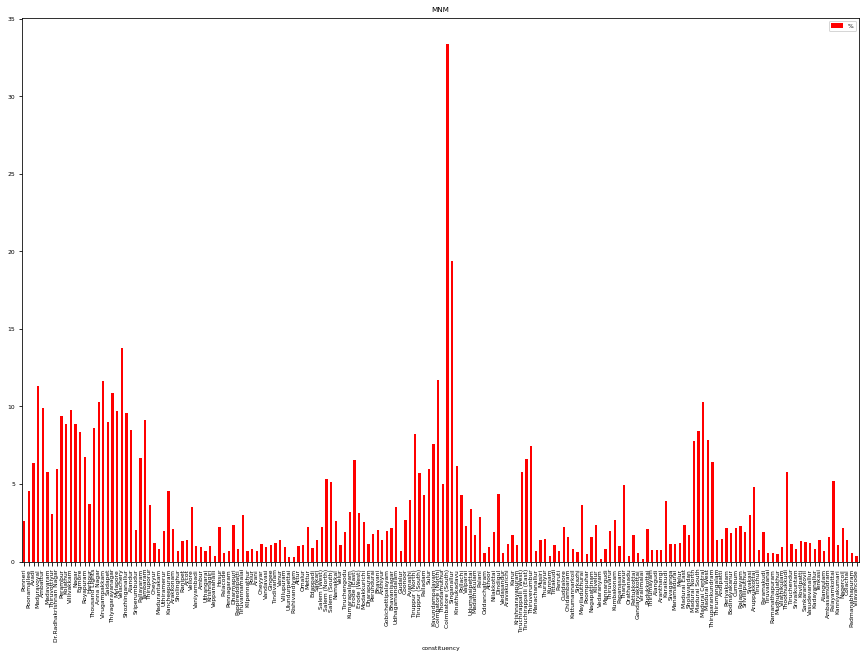

In [207]:
df_mnm.plot(x="constituency", y="%", kind="bar",color=df_mnm['result'].replace({1: "green", 0: "red"}), title='MNM', figsize=(15, 10))

In [247]:
tmp = df_mnm[-60:]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
144,Madurai North,12102,7.73,156556,0
145,Madurai South,12821,8.67,147833,0
146,Madurai Central,9459,10.00,94625,0
147,Madurai West,15849,7.86,201694,0
148,Thiruparankundram,8726,6.89,126734,0
164,Thoothukkudi,10534,5.59,188407,0
174,Palayamkottai,8107,5.03,161091,0


In [248]:
tmp = df_mnm[-120:-60]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
65,Salem (North),10718,5.30,202376,0
66,Salem (South),6632,5.31,124849,0
71,Erode (East),9875,6.59,149800,0
84,Tiruppur (North),19602,8.23,238092,0
85,Tiruppur (South),9934,5.70,174418,0
87,Sulur,12493,5.25,238183,0
88,Kavundampalayam,16161,7.40,218449,0
89,Coimbatore (North),13745,11.75,116987,0
90,Thondamuthur,11606,5.03,230531,0
91,Coimbatore (South),51481,33.26,154765,0


In [249]:
tmp = df_mnm[:-120]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
2,Avadi,9828,5.99,164112,0
3,Maduravoyal,28004,11.82,236939,0
4,Ambattur,12305,9.84,124990,0
5,Madavaram,14915,5.29,282029,0
7,Dr.Radhakrishnan Nagar,11198,5.99,187027,0
8,Perambur,15360,8.84,173664,0
9,Kolathur,6019,8.80,68372,0
10,Villivakkam,12784,9.47,135035,0
11,Nagar,7167,7.78,92117,0
12,Egmore,9990,8.38,119271,0


In [250]:
df_mnm[df_mnm['%']>10].count()

constituency       8
Total votes        8
%                  8
All party votes    8
result             8
dtype: int64

In [251]:
df_mnm[df_mnm['%']<1].count()

constituency       45
Total votes        45
%                  45
All party votes    45
result             45
dtype: int64

In [252]:
df_mnm[df_mnm.result == 1]

,constituency,Total votes,%,All party votes,result


# AMMK

In [253]:
df_ammk = get_data('Amma Makkal Munnettra Kazagam')

Ponneri 1.35 0
Thiruvallur 0.5 0
Poonamallee 3.34 0
Maduravoyal 1.0 0
Ambattur 0.99 0
Madavaram 2.39 0
Thiruvottiyur 0.71 0
Dr.Radhakrishnan Nagar 0.99 0
Perambur 2.11 0
Kolathur 0.68 0
Royapuram 0.93 0
Harbour 0.76 0
Thiruvallikeni 1.36 0
Thousand Lights 0.85 0
Anna Nagar 0.6 0
Saidapet 1.43 0
Thiyagarayanagar 0.57 0
Mylapore 0.73 0
Velachery 1.21 0
Sriperumbudur 1.48 0
Tambaram 1.76 0
Chengalpattu 1.12 0
Thiruporur 3.38 0
Uthiramerur 5.1 0
Kancheepuram 0.95 0
Arakkonam 2.79 0
Sholinghur 5.84 0
Katpadi 0.59 0
Ranipet 0.31 0
Arcot 1.04 0
Vellore 0.5 0
Anaikattu 0.58 0
Gudiyattam 0.83 0
Jolarpet 0.32 0
Tirupattur 1.45 0
Bargur 0.54 0
Hosur 0.32 0
Thalli 0.19 0
Dharmapuri 5.17 0
Pappireddipatti 7.18 0
Harur 7.22 0
Tiruvannamalai 1.01 0
Kilpennathur 1.07 0
Polur 0.32 0
Cheyyar 0.82 0
Vandavasi 0.93 0
Gingee 2.33 0
Villupuram 0.84 0
Vikravandi 1.58 0
Ulundurpettai 1.16 0
Rishivandiyam 4.7 0
Gangavalli 0.88 0
Attur 0.85 0
Omalur 0.43 0
Edappadi 0.29 0
Sankari 0.45 0
Salem (North) 0.4 0
Sale

In [254]:
df_ammk.describe()

,Total votes,%,All party votes,result
count,165.000000,165.000000,165.000000,165.0
mean,5608.042424,3.363697,166602.527273,0.0
std,8886.911894,5.228379,49742.765734,0.0
min,27.000000,0.190000,8872.000000,0.0
25%,1102.000000,0.730000,141102.000000,0.0
50%,2041.000000,1.170000,174536.000000,0.0
75%,5631.000000,3.440000,199818.000000,0.0
max,47774.000000,31.700000,282029.000000,0.0


In [255]:
df_ammk.result.sum()

0

In [256]:
vote_per = 100*df_ammk["Total votes"].sum()/df_ammk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 3.366 %


<AxesSubplot:title={'center':'AMMK'}, xlabel='constituency'>

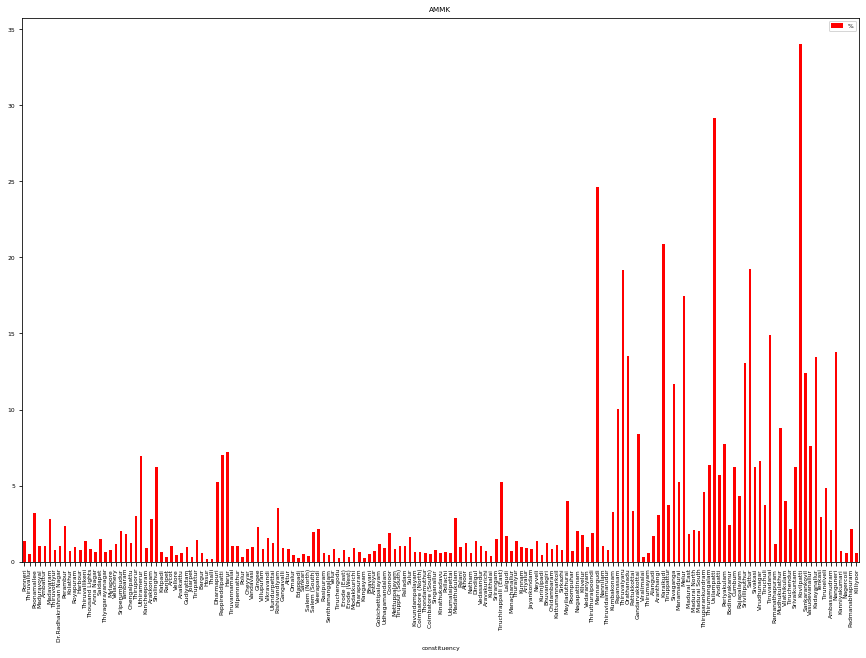

In [192]:
df_ammk.plot(x="constituency", y="%", kind="bar",color=df_ammk['result'].replace({1: "green", 0: "red"}), title='AMMK', figsize=(15, 10))

In [224]:
tmp = df_ammk[-60:]
tmp[tmp['%']>15]

,constituency,Total votes,%,All party votes,result
113,Mannargudi,28797,24.65,116808,0
118,Thiruvaiyaru,20464,19.20,106606,0
126,Karaikudi,39576,20.90,189395,0
130,Melur,24408,17.48,139617,0
136,Usilampatti,38093,29.14,130725,0
143,Sattur,22263,19.26,115602,0
153,Kovilpatti,28743,34.05,84414,0


In [193]:
df_ammk[df_ammk['%']>10].count()

constituency       15
Total votes        15
%                  15
All party votes    15
result             15
dtype: int64

In [194]:
df_ammk[df_ammk['%']>2].count()

constituency       59
Total votes        59
%                  59
All party votes    59
result             59
dtype: int64

In [195]:
df_ammk[df_ammk.result == 1]

,constituency,Total votes,%,All party votes,result


# DMDK

In [196]:
df_dmdk = get_data('Desiya Murpokku Dravida Kazhagam')

Gummidipoondi 1.21 0
Tiruttani 1.6 0
Avadi 0.6 0
Villivakkam 0.77 0
Nagar 0.73 0
Egmore 1.08 0
Virugampakkam 0.97 0
Shozhinganallur 0.69 0
Pallavaram 3.27 0
Cheyyur 1.87 0
Madurantakam 1.01 0
Kilvaithinankuppam 0.82 0
Uthangarai 1.29 0
Veppanahalli 1.76 0
Palacode 1.17 0
Pennagaram 1.63 0
Chengam 1.25 0
Kalasapakkam 1.2 0
Arani 0.57 0
Mailam 2.58 0
Tindivanam 1.45 0
Vanur 3.0 0
Tirukkoyilur 7.51 0
Kallakurichi 2.9 0
Yercaud 1.12 0
Mettur 0.88 0
Salem (West) 0.93 0
Namakkal 0.62 0
Kumarapalayam 0.51 0
Perundurai 0.41 0
Bhavanisagar 1.1 0
Gudalur 0.85 0
Avanashi 1.21 0
Tiruppur (North) 1.44 0
Valparai 0.92 0
Oddanchatram 0.67 0
Nilakkottai 1.97 0
Karur 0.46 0
Krishnarayapuram 0.93 0
Manapparai 4.07 0
Thiruverumbur 1.16 0
Musiri 1.77 0
Perambalur 1.27 0
Tittakudi 2.29 0
Vriddhachalam 12.68 0
Panruti 1.44 0
Cuddalore 0.84 0
Thanjavur 2.08 0
Peravurani 0.95 0
Pudukkottai 0.76 0
Sholavandan 1.65 0
Madurai West 1.69 0
Aruppukkottai 1.01 0
Paramakudi 1.07 0
Thoothukkudi 2.16 0
Ottapidaram 3.0 

In [64]:
df_dmdk.describe()

,Total votes,%,All party votes,result
count,60.000000,60.000000,60.000000,60.0
mean,1414.950000,1.756833,84632.766667,0.0
std,1518.538028,2.292449,46656.022270,0.0
min,123.000000,0.420000,12975.000000,0.0
25%,460.250000,0.897500,52931.500000,0.0
50%,1004.500000,1.160000,71891.500000,0.0
75%,1838.750000,1.702500,123474.500000,0.0
max,9041.000000,16.980000,184596.000000,0.0


In [65]:
vote_per = 100*df_dmdk["Total votes"].sum()/df_dmdk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 1.672 %


<AxesSubplot:title={'center':'DMDK'}, xlabel='constituency'>

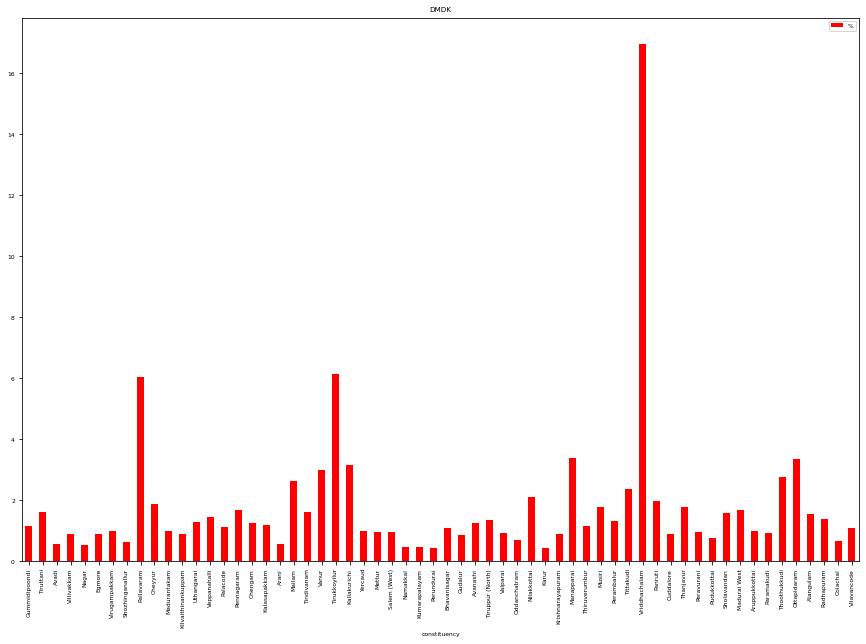

In [131]:
df_dmdk.plot(x="constituency", y="%", kind="bar",color=df_dmdk['result'].replace({1: "green", 0: "red"}), title='DMDK', figsize=(15, 10))

In [67]:
df_dmdk[df_dmdk['%']>10]

,constituency,Total votes,%,All party votes,result
44,Vriddhachalam,9041,16.98,53232,0


In [143]:
df_dmdk[df_dmdk.result == 1]

,constituency,Total votes,%,All party votes,result


# INC

In [68]:
df_inc = get_data('Indian National Congress')

Ponneri 44.87 1
Velachery 38.07 1
Sriperumbudur 40.56 0
Sholinghur 54.13 1
Uthangarai 37.47 0
Kallakurichi 38.6 0
Omalur 37.32 0
Erode (East) 42.59 1
Udhagamandalam 46.44 1
Coimbatore (South) 28.56 0
Udumalaipettai 36.98 0
Vriddhachalam 41.41 1
Mayiladuthurai 45.27 1
Aranthangi 49.13 1
Karaikudi 39.03 1
Melur 24.29 0
Srivilliputhur 33.91 0
Sivakasi 40.52 1
Tiruvadanai 46.52 1
Srivaikuntam 46.09 1
Tenkasi 41.47 0
Nanguneri 43.54 1
Colachal 63.45 1
Vilavancode 57.23 1
Killiyoor 61.98 1


In [69]:
df_inc.describe()

,Total votes,%,All party votes,result
count,25.00000,25.000000,25.000000,25.000000
mean,31165.00000,43.177200,72892.400000,0.640000
std,16147.38004,9.131389,34943.862709,0.489898
min,6189.00000,24.290000,13303.000000,0.000000
25%,18036.00000,38.070000,45682.000000,0.000000
50%,26780.00000,41.470000,70032.000000,1.000000
75%,39219.00000,46.440000,90067.000000,1.000000
max,65530.00000,63.450000,141102.000000,1.000000


In [74]:
df_inc.result.sum()

16

In [70]:
vote_per = 100*df_inc["Total votes"].sum()/df_inc['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 42.755 %


<AxesSubplot:title={'center':'INC'}, xlabel='constituency'>

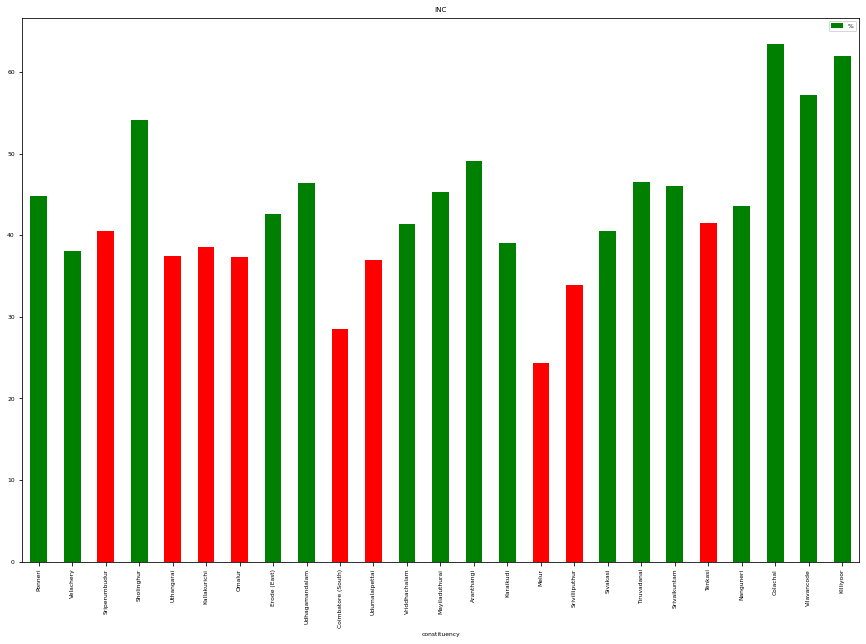

In [130]:
df_inc.plot(x="constituency", y="%", kind="bar",color=df_inc['result'].replace({1: "green", 0: "red"}), title='INC', figsize=(15, 10))

In [72]:
df_inc[df_inc['%']>43]

,constituency,Total votes,%,All party votes,result
0,Ponneri,49729,44.87,110829,1
3,Sholinghur,37323,54.13,68955,1
8,Udhagamandalam,65530,46.44,141102,1
12,Mayiladuthurai,36524,45.27,80676,1
13,Aranthangi,26780,49.13,54511,1
18,Tiruvadanai,6189,46.52,13303,1
19,Srivaikuntam,62802,46.09,136256,1
21,Nanguneri,39219,43.54,90067,1
22,Colachal,18036,63.45,28425,1
23,Vilavancode,24571,57.23,42937,1


In [142]:
df_inc[df_inc.result == 1]

,constituency,Total votes,%,All party votes,result
0,Ponneri,49729,44.87,110829,1
1,Velachery,10573,38.07,27775,1
3,Sholinghur,37323,54.13,68955,1
7,Erode (East),25446,42.59,59740,1
8,Udhagamandalam,65530,46.44,141102,1
11,Vriddhachalam,25323,41.41,61150,1
12,Mayiladuthurai,36524,45.27,80676,1
13,Aranthangi,26780,49.13,54511,1
14,Karaikudi,43823,39.03,112267,1
17,Sivakasi,28378,40.52,70032,1


# PMK

In [94]:
df_pmk = get_data('Pattali Makkal Katchi')

Gummidipoondi 36.26 0
Poonamallee 20.83 0
Thiruvallikeni 17.37 0
Thiruporur 35.37 0
Kancheepuram 48.96 1
Sholinghur 38.22 0
Arcot 40.01 0
Tirupattur 36.72 0
Pennagaram 52.46 1
Dharmapuri 47.36 1
Kilpennathur 40.87 0
Vandavasi 34.25 0
Gingee 36.31 0
Mailam 45.71 1
Sankarapuram 34.26 0
Mettur 39.22 0
Salem (West) 53.0 1
Athoor 13.06 0
Jayankondam 43.85 0
Vriddhachalam 34.88 0
Neyveli 45.21 0
Mayiladuthurai 40.12 0
Kilvelur 36.57 0


In [95]:
df_pmk.result.sum()

5

In [96]:
vote_per = 100*df_pmk["Total votes"].sum()/df_pmk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 37.372 %


<AxesSubplot:title={'center':'AIADMK'}, xlabel='constituency'>

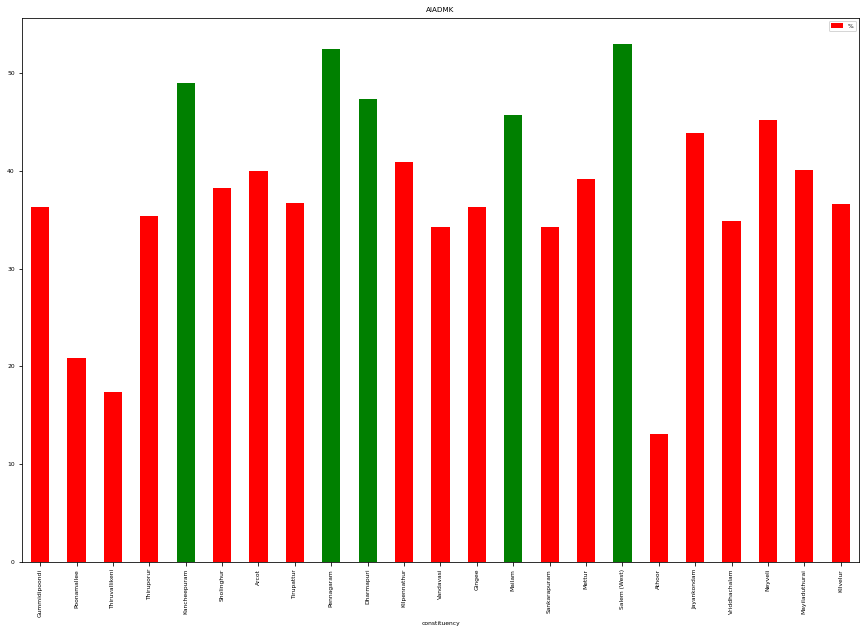

In [129]:
df_pmk.plot(x="constituency", y="%", kind="bar",color=df_pmk['result'].replace({1: "green", 0: "red"}), title='PMK', figsize=(15, 10))

In [141]:
df_pmk[df_pmk.result == 1]

,constituency,Total votes,%,All party votes,result
4,Kancheepuram,12844,48.96,26236,1
8,Pennagaram,40058,52.46,76352,1
9,Dharmapuri,85383,47.36,180281,1
13,Mailam,43420,45.71,94985,1
16,Salem (West),42384,53.00,79972,1


# VCK

In [73]:
df_vck = get_data('Viduthalai Chiruthaigal Katchi')

Thiruporur 43.88 1
Cheyyur 46.49 1
Arakkonam 33.97 0
Vanur 38.41 0
Kattumannarkoil 47.89 1
Nagapattinam 48.47 1


In [75]:
df_vck.result.sum()

4

In [76]:
vote_per = 100*df_vck["Total votes"].sum()/df_vck['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 41.000 %


<AxesSubplot:title={'center':'VCK'}, xlabel='constituency'>

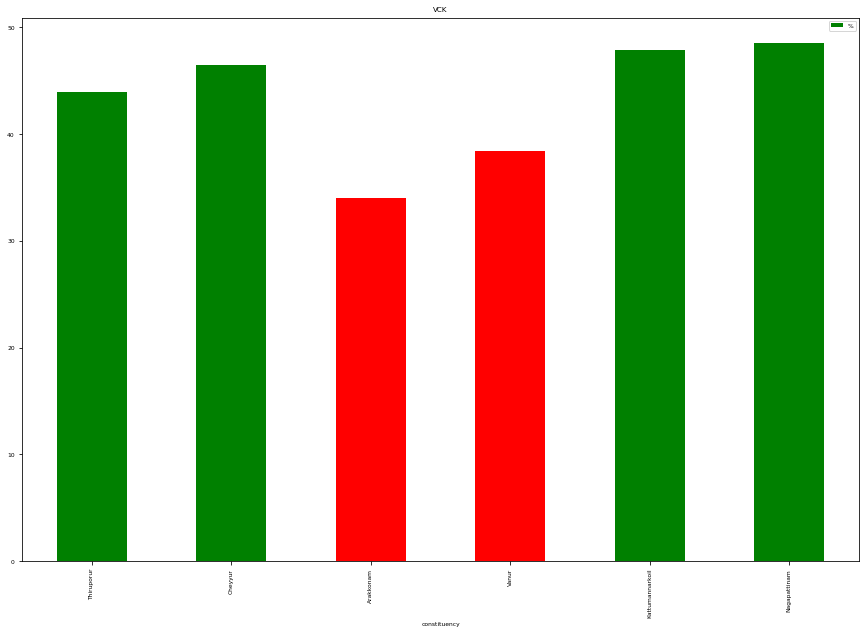

In [133]:
df_vck.plot(x="constituency", y="%", kind="bar",color=df_vck['result'].replace({1: "green", 0: "red"}), title='VCK', figsize=(15, 10))

In [139]:
df_vck[df_vck.result == 1]

,constituency,Total votes,%,All party votes,result
0,Thiruporur,43998,43.88,100271,1
1,Cheyyur,44975,46.49,96737,1
4,Kattumannarkoil,44383,47.89,92685,1
5,Nagapattinam,7829,48.47,16151,1


# BJP

In [134]:
df_bjp = get_data('Bharatiya Janata Party')

Harbour 31.52 0
Thousand Lights 27.29 0
Thalli 35.31 0
Tiruvannamalai 20.69 0
Tirukkoyilur 24.97 0
Modakkurichi 43.11 1
Dharapuram 45.81 0
Udhagamandalam 42.65 0
Coimbatore (South) 32.86 0
Aravakurichi 40.93 0
Tittakudi 35.6 0
Thiruvaiyaru 24.21 0
Karaikudi 24.96 0
Madurai North 32.22 0
Virudhunagar 32.05 0
Ramanathapuram 33.04 0
Tirunelveli 46.09 1
Nagercoil 51.63 1
Colachal 24.7 0
Vilavancode 30.21 0


In [135]:
df_bjp.result.sum()

3

In [136]:
vote_per = 100*df_bjp["Total votes"].sum()/df_bjp['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 33.984 %


<AxesSubplot:title={'center':'BJP'}, xlabel='constituency'>

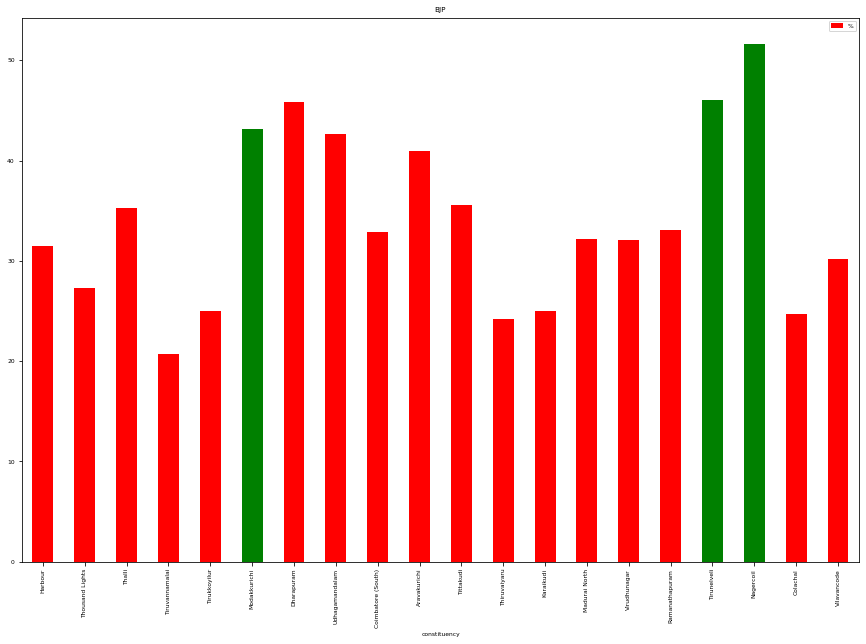

In [137]:
df_bjp.plot(x="constituency", y="%", kind="bar",color=df_bjp['result'].replace({1: "green", 0: "red"}), title='BJP', figsize=(15, 10))

In [138]:
df_bjp[df_bjp.result == 1]

,constituency,Total votes,%,All party votes,result
5,Modakkurichi,58940,43.11,136733,1
16,Tirunelveli,65856,46.09,142901,1
17,Nagercoil,34662,51.63,67138,1
